# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is inco

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Video Addition

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

# 🔧 Configuration
video_path = "/project/input/negative.mp4"  # <<< PUT YOUR VIDEO NAME HERE
output_csv = "/project/output/datasetX-other-mediapipe-33.csv"
class_label = "not jumping jack"
fps_skip = 2  # Extract every Nth frame to reduce redundancy

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, model_complexity=1, enable_segmentation=False, min_detection_confidence=0.5)

# Read video
cap = cv2.VideoCapture(video_path)
data = []
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_idx % fps_skip == 0:
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            keypoints = []
            for lm in results.pose_landmarks.landmark:
                keypoints.extend([lm.x, lm.y, lm.z, lm.visibility])
            keypoints.append(class_label)
            data.append(keypoints)

    frame_idx += 1

cap.release()

# Define column names
columns = []
for i in range(33):
    columns += [f'x{i}', f'y{i}', f'z{i}', f'v{i}']
columns.append('class')

# Save to CSV
df = pd.DataFrame(data, columns=columns)
df.to_csv(output_csv, index=False)
print(f"✅ Extracted {len(df)} frames and saved to: {output_csv}")


✅ Extracted 1656 frames and saved to: /project/output/datasetX-other-mediapipe-33.csv


## Download Data

In [ ]:
# Upload your 33-keypoint MediaPipe-based data before executing
path_workout = "/project/output/datasetX-jumping-jacks-mediapipe-33-fromvideo.csv"  # update path as needed
path_other = "/project/output/datasetX-other-mediapipe-33.csv"    # update path as needed
name_class = "jumping jack"

# If using different input resolutions, define here
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,class
0,0.503513,0.257183,-0.277074,0.999996,0.509199,0.243569,-0.261601,0.999984,0.512823,0.243571,...,0.834069,0.538474,0.927020,0.042035,0.986765,0.484927,0.928822,0.042288,0.981562,jumping jack
1,0.504239,0.257225,-0.288970,0.999996,0.509876,0.243625,-0.274081,0.999984,0.513215,0.243635,...,0.838123,0.538455,0.928581,0.082086,0.987295,0.484686,0.928817,0.073354,0.982237,jumping jack
2,0.505153,0.257303,-0.289587,0.999996,0.510589,0.243727,-0.274671,0.999984,0.513663,0.243747,...,0.841454,0.538441,0.929373,0.084453,0.987738,0.484552,0.928815,0.075230,0.982827,jumping jack
3,0.505690,0.257403,-0.287892,0.999996,0.511044,0.243865,-0.272722,0.999985,0.513997,0.243889,...,0.844546,0.538404,0.929731,0.081397,0.988144,0.484503,0.928730,0.075464,0.983347,jumping jack
4,0.505870,0.257576,-0.286214,0.999996,0.511300,0.244043,-0.271181,0.999985,0.514219,0.244078,...,0.847304,0.538389,0.929908,0.077104,0.988512,0.484499,0.928637,0.072503,0.983803,jumping jack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.494017,0.258888,-0.264669,0.999989,0.499206,0.246077,-0.249604,0.999971,0.502572,0.246192,...,0.847761,0.531064,0.893330,0.007637,0.987702,0.483540,0.894890,0.011804,0.984473,jumping jack
151,0.493988,0.259021,-0.264675,0.999990,0.499194,0.246157,-0.249663,0.999972,0.502520,0.246263,...,0.846678,0.530955,0.893292,-0.005511,0.987767,0.483375,0.894364,0.006040,0.984382,jumping jack
152,0.493991,0.259160,-0.264470,0.999990,0.499201,0.246254,-0.249584,0.999973,0.502493,0.246348,...,0.846050,0.530897,0.893260,-0.006158,0.987830,0.483237,0.893942,0.005629,0.984327,jumping jack
153,0.494063,0.259283,-0.264253,0.999991,0.499265,0.246327,-0.249464,0.999974,0.502536,0.246411,...,0.846695,0.530872,0.893239,0.003088,0.987947,0.483139,0.893543,0.008974,0.984428,jumping jack


In [ ]:
df_other

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,class
0,0.359588,0.467875,-0.261728,0.999921,0.362299,0.456672,-0.253700,0.999742,0.364084,0.457115,...,0.863877,0.383346,0.941624,0.024547,0.979810,0.309374,0.961738,-0.040283,0.983387,not jumping jack
1,0.359722,0.449618,0.077056,0.999919,0.361670,0.439749,0.064418,0.999753,0.361855,0.438960,...,0.872957,0.308617,0.945035,-0.016963,0.978856,0.383725,0.938103,-0.003832,0.979449,not jumping jack
2,0.359361,0.445121,-0.010633,0.999918,0.360504,0.434916,-0.015491,0.999761,0.360375,0.434440,...,0.878662,0.316202,0.948979,-0.014227,0.978454,0.381142,0.932046,-0.002163,0.976601,not jumping jack
3,0.358014,0.437971,0.117283,0.999923,0.357928,0.428184,0.103437,0.999782,0.357366,0.427823,...,0.889045,0.302532,0.944557,-0.034093,0.973197,0.380016,0.927542,-0.012528,0.971605,not jumping jack
4,0.356057,0.431624,0.128837,0.999928,0.355500,0.421894,0.111334,0.999800,0.354721,0.421673,...,0.897738,0.300096,0.934581,-0.041649,0.963826,0.381194,0.923696,-0.000150,0.959946,not jumping jack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.181071,0.402546,-0.092718,0.986468,0.184441,0.387366,-0.099166,0.986504,0.185915,0.387083,...,0.790436,0.264748,1.034821,-0.123066,0.817679,0.145426,0.984435,0.067573,0.803294,not jumping jack
1652,0.182553,0.468200,-0.159472,0.986641,0.188352,0.455904,-0.159441,0.985707,0.190785,0.456946,...,0.795374,0.273181,1.036385,-0.092126,0.829000,0.148191,0.979658,0.147429,0.802414,not jumping jack
1653,0.178523,0.550714,-0.265502,0.987697,0.183061,0.536364,-0.260842,0.986548,0.186119,0.536465,...,0.809091,0.285563,1.026925,-0.014278,0.836275,0.146900,0.980276,-0.033961,0.815481,not jumping jack
1654,0.174708,0.624376,-0.242670,0.988852,0.179510,0.610240,-0.247255,0.987715,0.182078,0.609667,...,0.823353,0.289656,1.008170,-0.049346,0.847144,0.153810,0.971887,-0.071461,0.830367,not jumping jack


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,class
0,0.503513,0.257183,-0.277074,0.999996,0.509199,0.243569,-0.261601,0.999984,0.512823,0.243571,...,0.834069,0.538474,0.927020,0.042035,0.986765,0.484927,0.928822,0.042288,0.981562,jumping jack
1,0.504239,0.257225,-0.288970,0.999996,0.509876,0.243625,-0.274081,0.999984,0.513215,0.243635,...,0.838123,0.538455,0.928581,0.082086,0.987295,0.484686,0.928817,0.073354,0.982237,jumping jack
2,0.505153,0.257303,-0.289587,0.999996,0.510589,0.243727,-0.274671,0.999984,0.513663,0.243747,...,0.841454,0.538441,0.929373,0.084453,0.987738,0.484552,0.928815,0.075230,0.982827,jumping jack
3,0.505690,0.257403,-0.287892,0.999996,0.511044,0.243865,-0.272722,0.999985,0.513997,0.243889,...,0.844546,0.538404,0.929731,0.081397,0.988144,0.484503,0.928730,0.075464,0.983347,jumping jack
4,0.505870,0.257576,-0.286214,0.999996,0.511300,0.244043,-0.271181,0.999985,0.514219,0.244078,...,0.847304,0.538389,0.929908,0.077104,0.988512,0.484499,0.928637,0.072503,0.983803,jumping jack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.494017,0.258888,-0.264669,0.999989,0.499206,0.246077,-0.249604,0.999971,0.502572,0.246192,...,0.847761,0.531064,0.893330,0.007637,0.987702,0.483540,0.894890,0.011804,0.984473,jumping jack
151,0.493988,0.259021,-0.264675,0.999990,0.499194,0.246157,-0.249663,0.999972,0.502520,0.246263,...,0.846678,0.530955,0.893292,-0.005511,0.987767,0.483375,0.894364,0.006040,0.984382,jumping jack
152,0.493991,0.259160,-0.264470,0.999990,0.499201,0.246254,-0.249584,0.999973,0.502493,0.246348,...,0.846050,0.530897,0.893260,-0.006158,0.987830,0.483237,0.893942,0.005629,0.984327,jumping jack
153,0.494063,0.259283,-0.264253,0.999991,0.499265,0.246327,-0.249464,0.999974,0.502536,0.246411,...,0.846695,0.530872,0.893239,0.003088,0.987947,0.483139,0.893543,0.008974,0.984428,jumping jack


In [ ]:
df_other["class"] = "other"
df_other

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,class
0,0.359588,0.467875,-0.261728,0.999921,0.362299,0.456672,-0.253700,0.999742,0.364084,0.457115,...,0.863877,0.383346,0.941624,0.024547,0.979810,0.309374,0.961738,-0.040283,0.983387,other
1,0.359722,0.449618,0.077056,0.999919,0.361670,0.439749,0.064418,0.999753,0.361855,0.438960,...,0.872957,0.308617,0.945035,-0.016963,0.978856,0.383725,0.938103,-0.003832,0.979449,other
2,0.359361,0.445121,-0.010633,0.999918,0.360504,0.434916,-0.015491,0.999761,0.360375,0.434440,...,0.878662,0.316202,0.948979,-0.014227,0.978454,0.381142,0.932046,-0.002163,0.976601,other
3,0.358014,0.437971,0.117283,0.999923,0.357928,0.428184,0.103437,0.999782,0.357366,0.427823,...,0.889045,0.302532,0.944557,-0.034093,0.973197,0.380016,0.927542,-0.012528,0.971605,other
4,0.356057,0.431624,0.128837,0.999928,0.355500,0.421894,0.111334,0.999800,0.354721,0.421673,...,0.897738,0.300096,0.934581,-0.041649,0.963826,0.381194,0.923696,-0.000150,0.959946,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.181071,0.402546,-0.092718,0.986468,0.184441,0.387366,-0.099166,0.986504,0.185915,0.387083,...,0.790436,0.264748,1.034821,-0.123066,0.817679,0.145426,0.984435,0.067573,0.803294,other
1652,0.182553,0.468200,-0.159472,0.986641,0.188352,0.455904,-0.159441,0.985707,0.190785,0.456946,...,0.795374,0.273181,1.036385,-0.092126,0.829000,0.148191,0.979658,0.147429,0.802414,other
1653,0.178523,0.550714,-0.265502,0.987697,0.183061,0.536364,-0.260842,0.986548,0.186119,0.536465,...,0.809091,0.285563,1.026925,-0.014278,0.836275,0.146900,0.980276,-0.033961,0.815481,other
1654,0.174708,0.624376,-0.242670,0.988852,0.179510,0.610240,-0.247255,0.987715,0.182078,0.609667,...,0.823353,0.289656,1.008170,-0.049346,0.847144,0.153810,0.971887,-0.071461,0.830367,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,class
0,0.503513,0.257183,-0.277074,0.999996,0.509199,0.243569,-0.261601,0.999984,0.512823,0.243571,...,0.834069,0.538474,0.927020,0.042035,0.986765,0.484927,0.928822,0.042288,0.981562,jumping jack
1,0.504239,0.257225,-0.288970,0.999996,0.509876,0.243625,-0.274081,0.999984,0.513215,0.243635,...,0.838123,0.538455,0.928581,0.082086,0.987295,0.484686,0.928817,0.073354,0.982237,jumping jack
2,0.505153,0.257303,-0.289587,0.999996,0.510589,0.243727,-0.274671,0.999984,0.513663,0.243747,...,0.841454,0.538441,0.929373,0.084453,0.987738,0.484552,0.928815,0.075230,0.982827,jumping jack
3,0.505690,0.257403,-0.287892,0.999996,0.511044,0.243865,-0.272722,0.999985,0.513997,0.243889,...,0.844546,0.538404,0.929731,0.081397,0.988144,0.484503,0.928730,0.075464,0.983347,jumping jack
4,0.505870,0.257576,-0.286214,0.999996,0.511300,0.244043,-0.271181,0.999985,0.514219,0.244078,...,0.847304,0.538389,0.929908,0.077104,0.988512,0.484499,0.928637,0.072503,0.983803,jumping jack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.181071,0.402546,-0.092718,0.986468,0.184441,0.387366,-0.099166,0.986504,0.185915,0.387083,...,0.790436,0.264748,1.034821,-0.123066,0.817679,0.145426,0.984435,0.067573,0.803294,other
1807,0.182553,0.468200,-0.159472,0.986641,0.188352,0.455904,-0.159441,0.985707,0.190785,0.456946,...,0.795374,0.273181,1.036385,-0.092126,0.829000,0.148191,0.979658,0.147429,0.802414,other
1808,0.178523,0.550714,-0.265502,0.987697,0.183061,0.536364,-0.260842,0.986548,0.186119,0.536465,...,0.809091,0.285563,1.026925,-0.014278,0.836275,0.146900,0.980276,-0.033961,0.815481,other
1809,0.174708,0.624376,-0.242670,0.988852,0.179510,0.610240,-0.247255,0.987715,0.182078,0.609667,...,0.823353,0.289656,1.008170,-0.049346,0.847144,0.153810,0.971887,-0.071461,0.830367,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32
0,0.503513,0.257183,-0.277074,0.999996,0.509199,0.243569,-0.261601,0.999984,0.512823,0.243571,...,0.154582,0.834069,0.538474,0.927020,0.042035,0.986765,0.484927,0.928822,0.042288,0.981562
1,0.504239,0.257225,-0.288970,0.999996,0.509876,0.243625,-0.274081,0.999984,0.513215,0.243635,...,0.183541,0.838123,0.538455,0.928581,0.082086,0.987295,0.484686,0.928817,0.073354,0.982237
2,0.505153,0.257303,-0.289587,0.999996,0.510589,0.243727,-0.274671,0.999984,0.513663,0.243747,...,0.185220,0.841454,0.538441,0.929373,0.084453,0.987738,0.484552,0.928815,0.075230,0.982827
3,0.505690,0.257403,-0.287892,0.999996,0.511044,0.243865,-0.272722,0.999985,0.513997,0.243889,...,0.183585,0.844546,0.538404,0.929731,0.081397,0.988144,0.484503,0.928730,0.075464,0.983347
4,0.505870,0.257576,-0.286214,0.999996,0.511300,0.244043,-0.271181,0.999985,0.514219,0.244078,...,0.180594,0.847304,0.538389,0.929908,0.077104,0.988512,0.484499,0.928637,0.072503,0.983803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.181071,0.402546,-0.092718,0.986468,0.184441,0.387366,-0.099166,0.986504,0.185915,0.387083,...,0.134616,0.790436,0.264748,1.034821,-0.123066,0.817679,0.145426,0.984435,0.067573,0.803294
1807,0.182553,0.468200,-0.159472,0.986641,0.188352,0.455904,-0.159441,0.985707,0.190785,0.456946,...,0.193904,0.795374,0.273181,1.036385,-0.092126,0.829000,0.148191,0.979658,0.147429,0.802414
1808,0.178523,0.550714,-0.265502,0.987697,0.183061,0.536364,-0.260842,0.986548,0.186119,0.536465,...,0.022441,0.809091,0.285563,1.026925,-0.014278,0.836275,0.146900,0.980276,-0.033961,0.815481
1809,0.174708,0.624376,-0.242670,0.988852,0.179510,0.610240,-0.247255,0.987715,0.182078,0.609667,...,-0.020775,0.823353,0.289656,1.008170,-0.049346,0.847144,0.153810,0.971887,-0.071461,0.830367


In [ ]:
y

,class
0,jumping jack
1,jumping jack
2,jumping jack
3,jumping jack
4,jumping jack
...,...
1806,other
1807,other
1808,other
1809,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32
0,0.503513,0.257183,-0.277074,0.999996,0.509199,0.243569,-0.261601,0.999984,0.512823,0.243571,...,0.154582,0.834069,0.538474,0.927020,0.042035,0.986765,0.484927,0.928822,0.042288,0.981562
1,0.504239,0.257225,-0.288970,0.999996,0.509876,0.243625,-0.274081,0.999984,0.513215,0.243635,...,0.183541,0.838123,0.538455,0.928581,0.082086,0.987295,0.484686,0.928817,0.073354,0.982237
2,0.505153,0.257303,-0.289587,0.999996,0.510589,0.243727,-0.274671,0.999984,0.513663,0.243747,...,0.185220,0.841454,0.538441,0.929373,0.084453,0.987738,0.484552,0.928815,0.075230,0.982827
3,0.505690,0.257403,-0.287892,0.999996,0.511044,0.243865,-0.272722,0.999985,0.513997,0.243889,...,0.183585,0.844546,0.538404,0.929731,0.081397,0.988144,0.484503,0.928730,0.075464,0.983347
4,0.505870,0.257576,-0.286214,0.999996,0.511300,0.244043,-0.271181,0.999985,0.514219,0.244078,...,0.180594,0.847304,0.538389,0.929908,0.077104,0.988512,0.484499,0.928637,0.072503,0.983803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.181071,0.402546,-0.092718,0.986468,0.184441,0.387366,-0.099166,0.986504,0.185915,0.387083,...,0.134616,0.790436,0.264748,1.034821,-0.123066,0.817679,0.145426,0.984435,0.067573,0.803294
1807,0.182553,0.468200,-0.159472,0.986641,0.188352,0.455904,-0.159441,0.985707,0.190785,0.456946,...,0.193904,0.795374,0.273181,1.036385,-0.092126,0.829000,0.148191,0.979658,0.147429,0.802414
1808,0.178523,0.550714,-0.265502,0.987697,0.183061,0.536364,-0.260842,0.986548,0.186119,0.536465,...,0.022441,0.809091,0.285563,1.026925,-0.014278,0.836275,0.146900,0.980276,-0.033961,0.815481
1809,0.174708,0.624376,-0.242670,0.988852,0.179510,0.610240,-0.247255,0.987715,0.182078,0.609667,...,-0.020775,0.823353,0.289656,1.008170,-0.049346,0.847144,0.153810,0.971887,-0.071461,0.830367


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

### Split Dataset

In [ ]:
# Proporsi split (90:10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 1629
The number of test data X is: 182
The number of train data y is : 1629
The number of test daya y is : 182
The total dataset is : 1811


## Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(132,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    # Changed to 2 output neurons and softmax activation for one-hot encoded target
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,426 (107.13 KB)

 Trainable params: 27,426 (107.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
from sklearn.model_selection import train_test_split
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9900 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 1.6187e-05
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 1.4204e-04 - val_accuracy: 1.0000 - val_loss: 2.7355e-05
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9969 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 4.6701e-07
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 2.0263e-05 - val_accuracy: 1.0000 - val_loss: 2.7706e-07
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 1.3375e-05 - val_accuracy: 1.0000 - val_loss: 1.3100e-08
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.0106e-04 - val_accuracy: 1.0000 - val_loss: 4.5850e-09
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - loss: 5.4890e-04 - val_accuracy: 1.0000 - val_loss: 4.3230e-08
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accu

## Visualization Acc & Loss

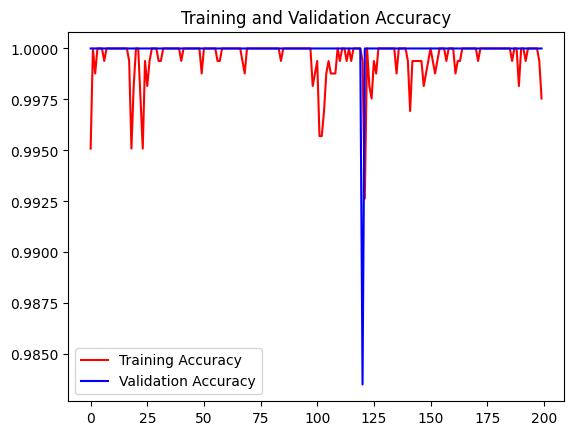

<Figure size 640x480 with 0 Axes>

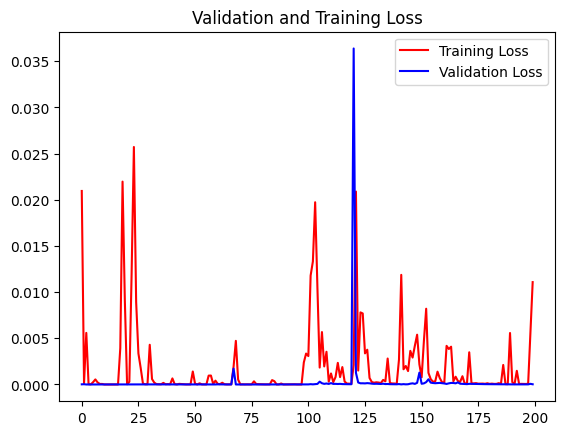

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.1739657313446514e-05
Test accuracy: 1.0


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,x0,y0,z0,v0,x1,y1,z1,v1,x2,y2,...,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32
564,0.238051,0.577647,-0.096711,0.999015,0.239973,0.566102,-0.10848,0.99882,0.241508,0.565317,...,-0.023515,0.734573,0.410724,0.770009,-0.057546,0.683127,0.328333,0.786927,-0.02317,0.761355


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['jumping jack', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
jumping jack


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.7
    Uninstalling protobuf-4.25.7:
      Successfully uninstalled protobuf-4.25.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.4 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-05-20 19:03:22.229024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747767802.290593   16539 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747767802.304723   16539 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)
  adding: content/tfjs_float_model_workout/model.json (deflated 81%)


Don't forget to download tfjs model (check relatable folder)